<a href="https://colab.research.google.com/github/sharinkan/LinkedInWebScraper/blob/main/Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb

wget -N https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/118.0.5993.70/linux64/chromedriver-linux64.zip -P /tmp/
unzip -o /tmp/chromedriver-linux64.zip -d /tmp/
chmod +x /tmp/chromedriver-linux64/chromedriver
mv /tmp/chromedriver-linux64/chromedriver /usr/local/bin/chromedriver

pip install selenium chromedriver_autoinstaller

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [999 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:14 https

In [55]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chromedriver_autoinstaller.install()

'/usr/local/lib/python3.10/dist-packages/chromedriver_autoinstaller/128/chromedriver'

In [56]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [57]:
# LinkedIn URL of all data scientist positions
url_ds = "https://www.linkedin.com/jobs/search?keywords=data%20scientist&location=&geoId=&trk=homepage-jobseeker_jobs-search-bar_search-submit&position=1&pageNum=0"
# LinkedIn URL of all data analyst positions
url_da = "https://www.linkedin.com/jobs/search?keywords=Data%20Analyst&location=United%20States&geoId=103644278&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0"
# LinkedIn URL of all data engineer positions
url_de = "https://www.linkedin.com/jobs/search?keywords=Data%20Engineer&location=United%20States&geoId=103644278&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0"

In [61]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
import chromedriver_autoinstaller
from time import sleep

def get_job_links_and_company_names(url):
    """
    This function takes a LinkedIn job search URL as input and returns a list of job links, job titles, and company names.

    Args:
      url: The LinkedIn job search URL.

    Returns:
      A tuple containing three lists: job_link, job_title, and company_name.
    """
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chromedriver_autoinstaller.install()

    driver = webdriver.Chrome(options=chrome_options)
    driver.get(url)

    # Scroll to load more jobs
    i = 1
    while i <= 10:
        driver.execute_script("window.scrollBy(0, document.body.scrollHeight)")
        i += 1
        sleep(5)

    # Wait for job listings to load
    jobs = WebDriverWait(driver, 5).until(
        EC.presence_of_all_elements_located((By.XPATH, "//ul[@class='jobs-search__results-list']/li"))
    )

    job_link = []
    # job_title = []
    # company_name = []

    # Extract job links, titles, and company names
    for i in range(min(200, len(jobs))):
        try:
            # Extract job link
            link = WebDriverWait(jobs[i], 5).until(
                EC.presence_of_element_located((By.XPATH, ".//a"))
            ).get_attribute("href")
            job_link.append(link)
            print(f"Job link: {link}")

        #     # Extract job title
        #     title = WebDriverWait(jobs[i], 30).until(
        #         EC.presence_of_element_located((By.XPATH, ".//h3[contains(@class, 'base-search-card__title')]"))
        #     ).text
        #     job_title.append(title)
        #     print(f"Job title: {title}")

        #     # Extract company name
        #     name = WebDriverWait(jobs[i], 30).until(
        #         EC.presence_of_element_located((By.XPATH, ".//h4[contains(@class, 'base-search-card__subtitle')]"))
        #     ).text
        #     company_name.append(name)
        #     print(f"Company name: {name}")
        except Exception as e:
            print(f"Error extracting data for job {i}: {e}")

    driver.quit()
    return job_link
    # return job_title, job_link, company_name

In [59]:
# Get job links for each role
job_link_ds = get_job_links_and_company_names(url_ds)
job_link_da = get_job_links_and_company_names(url_da)
job_link_de = get_job_links_and_company_names(url_de)

Job link: https://www.linkedin.com/jobs/view/ml-research-engineer-new-grad-at-genesis-therapeutics-4024734827?position=1&pageNum=0&refId=CX08w644iIKkIIRpCUc35g%3D%3D&trackingId=63HLKX2VAAJPFgSIZWKAvQ%3D%3D&trk=public_jobs_jserp-result_search-card
Job link: https://www.linkedin.com/jobs/view/data-scientist-product-analytics-at-etsy-4022499211?position=2&pageNum=0&refId=CX08w644iIKkIIRpCUc35g%3D%3D&trackingId=BcnsaYqoYtGJ2z6bUR18Kw%3D%3D&trk=public_jobs_jserp-result_search-card
Job link: https://www.linkedin.com/jobs/view/data-scientist-at-fractal-4020459102?position=3&pageNum=0&refId=CX08w644iIKkIIRpCUc35g%3D%3D&trackingId=KkeLo4yWFtMGoUtq5H0zOQ%3D%3D&trk=public_jobs_jserp-result_search-card
Job link: https://www.linkedin.com/jobs/view/data-scientist-at-l-e-k-consulting-4022921679?position=4&pageNum=0&refId=CX08w644iIKkIIRpCUc35g%3D%3D&trackingId=iP%2FEjI%2BFP0wuE5OGOZ5CMg%3D%3D&trk=public_jobs_jserp-result_search-card
Job link: https://www.linkedin.com/jobs/view/data-scientist-l5-ads-e

In [62]:
len(job_link_da), len(job_link_de), len(job_link_ds)

(100, 110, 119)

In [63]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException
from selenium import webdriver
import chromedriver_autoinstaller
from time import sleep

def get_job_titles(links):
    """
    This function takes a list of LinkedIn job page URLs and extracts the job title
    from the specified div element for each URL.

    Args:
        links: A list of LinkedIn job page URLs.

    Returns:
        A list containing the job title text for each URL.
    """
    # List to hold job titles
    titles = []

    # Iterate through each link
    for link in links:
        # Initialize the WebDriver
        driver = webdriver.Chrome(options=chrome_options)
        driver.get(link)

        # Extract the job title text using the given XPath
        try:
            title = WebDriverWait(driver, 3).until(
                EC.presence_of_element_located((By.XPATH, "//*[@id='main-content']/section[1]/div/section[2]/div/div[1]/div/h1"))
            ).text
            print("Job title extracted successfully!")

            # Append the job title text to the titles list
            titles.append(title)

        except (NoSuchElementException, TimeoutException):
            print(f"Could not find the job title for the link: {link}")
            titles.append("")  # Add an empty string if the title is not found

        finally:
            # Close the driver
            driver.quit()

    # Return the list containing all the job titles
    return titles


def get_company_names(links):
    """
    This function takes a list of LinkedIn job page URLs and extracts the company name
    from the specified element for each URL.

    Args:
        links: A list of LinkedIn job page URLs.

    Returns:
        A list containing the company name for each URL.
    """
    # List to hold company names
    company_names = []

    # Iterate through each link
    for link in links:
        # Initialize the WebDriver
        driver = webdriver.Chrome(options=chrome_options)
        driver.get(link)

        # Extract the company name using the given XPath
        try:
            company_name = WebDriverWait(driver, 3).until(
                EC.presence_of_element_located((By.XPATH, "//*[@id='main-content']/section[1]/div/section[2]/div/div[1]/div/h4/div[1]/span[1]/a"))
            ).text
            print("Company name extracted successfully!")

            # Append the company name to the company_names list
            company_names.append(company_name)

        except (NoSuchElementException, TimeoutException):
            print(f"Could not find the company name for the link: {link}")
            company_names.append("")  # Add an empty string if the company name is not found

        finally:
            # Close the driver
            driver.quit()

    # Return the list containing all the company names
    return company_names


def get_job_descriptions(links):
    """
    This function takes a list of LinkedIn job page URLs and extracts the job description
    from the specified div element for each URL.

    Args:
        links: A list of LinkedIn job page URLs.

    Returns:
        A list containing the job description text for each URL.
    """
    # List to hold job descriptions
    description = []

    # Iterate through each link
    for link in links:
        # Initialize the WebDriver
        driver = webdriver.Chrome(options=chrome_options)
        driver.get(link)

        # Add some wait time to allow the page to load fully
        sleep(3)

        try:
            # Try to find and click the 'Show More' button if available
            button = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, "//*[@id='main-content']/section[1]/div/div[1]/section[1]/div/div/section/button[1]"))
            )
            driver.execute_script("arguments[0].click()", button)
            sleep(3)
        except (NoSuchElementException, TimeoutException):
            print(f"No 'Show More' button found or button click timeout.")
            pass  # Proceed even if no button is found

        # Extract the job description text using the updated XPath
        try:
            text = WebDriverWait(driver, 10).until(
                EC.presence_of_element_located((By.XPATH, "//div[contains(@class, 'show-more-less-html__markup')]"))
            ).text
            print("Job description extracted successfully!")

            # Append the job description text to the holder list
            description.append(text)

        except (NoSuchElementException, TimeoutException):
            print(f"Could not find the job description for the link: {link}")
            description.append("")  # Add an empty string if the description is not found

        finally:
            # Close the driver
            driver.quit()

    # Return the list containing all the job descriptions
    return description

In [64]:
job_title_ds, company_name_ds, descriptions_ds = get_job_titles(job_link_ds), get_company_names(job_link_ds), get_job_descriptions(job_link_ds)
job_title_da, company_name_da, descriptions_da = get_job_titles(job_link_da), get_company_names(job_link_da), get_job_descriptions(job_link_da)
job_title_de, company_name_de, descriptions_de = get_job_titles(job_link_de), get_company_names(job_link_de), get_job_descriptions(job_link_de)

Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Job title extracted successfully!
Could not find the job title for the link: https://www.linkedin.com/jobs/view/junior-data-scientist-at-bluegrace-logistics-4023677960?position=23&pageNum=0&refId=CX08w644iIKkIIRpCUc35g%3D%3D&trackingId=3aRlspP3hmU0TjK9VdJzXQ%3D%3D&trk=public_jobs_jserp

## Data Pre-processing
### 2.1 Create Data Frame

In [65]:
import pandas as pd
import os

def create_job_dataframe(links, job_titles, company_names, descriptions, filename=None):
    """
    This function creates a DataFrame with link, job title, company name, and description.

    Args:
        links: List of job links.
        job_titles: List of job titles.
        company_names: List of company names.
        descriptions: List of job descriptions.
        filename: Optional; name of the CSV file to save the DataFrame.

    Returns:
        DataFrame with the job details.
    """
    os.chdir('/content/drive/MyDrive/Colab Notebooks/Drexel/INFO-I499')

    # Ensure all input lists are of the same length
    if not (len(links) == len(job_titles) == len(company_names) == len(descriptions)):
        raise ValueError("All input lists must have the same length.")

    # Create a DataFrame
    data = {
        "Title": job_titles,
        "Company": company_names,
        "Description": descriptions,
        "Link": links

    }
    df = pd.DataFrame(data)

    # If filename is provided, append to the existing file
    if filename:
        # Check if the file already exists
        if os.path.exists(filename):
            # Append to the file without writing the header
            df.to_csv(filename, mode='a', header=False, index=False)
            # print(f"Appended to {filename}")
        else:
            # Write a new file with the header
            df.to_csv(filename, mode='w', header=True, index=False)
            # print(f"Created and saved new file: {filename}")

    return pd.read_csv(filename)
    # return df

In [67]:
df_ds = create_job_dataframe(job_link_ds, job_title_ds, company_name_ds, descriptions_ds, 'df_ds.csv')
df_da = create_job_dataframe(job_link_da, job_title_da, company_name_da, descriptions_da, 'df_da.csv')
df_de = create_job_dataframe(job_link_de, job_title_de, company_name_de, descriptions_de, 'df_de.csv')

In [73]:
len(df_de)

210

In [74]:
def analyze_dataframes(dataframes_dict):
    """
    This function takes a dictionary of dataframes as input and prints:
    - The number of unique company names.
    - The number of empty descriptions ("").

    Args:
        dataframes_dict: A dictionary where the keys are the dataframe names (as strings) and the values are the actual DataFrames.

    Returns:
        None (prints results for each dataframe).
    """

    for df_name, df in dataframes_dict.items():
        # Count the number of unique company names
        unique_companies = df['Company'].nunique()

        # Count the number of empty descriptions
        empty_descriptions = df['Description'].eq("").sum()

        # Print the results for this dataframe
        print(f"{df_name}:")
        print(f"  Number of unique company names: {unique_companies}")
        print(f"  Number of empty descriptions: {empty_descriptions}\n")


dataframes_dict = {
    "Data Scientist": df_ds,
    "Data Analyst": df_da,
    "Data Engineer": df_de
}

# Assuming you have 3 dataframes: df_analyst, df_engineer, df_scientist
analyze_dataframes(dataframes_dict)


Data Scientist:
  Number of unique company names: 82
  Number of empty descriptions: 0

Data Analyst:
  Number of unique company names: 105
  Number of empty descriptions: 0

Data Engineer:
  Number of unique company names: 86
  Number of empty descriptions: 0



### 2.2 Handle Missing Job Descriptions

In [78]:
df_ds.dropna()

,Title,Company,Description,Link
0,ML Research Engineer (New Grad),Genesis Therapeutics,Genesis is building a world-class ML team in a...,https://www.linkedin.com/jobs/view/ml-research...
1,"Data Scientist, Product Analytics",Etsy,Etsy is the global marketplace for unique and ...,https://www.linkedin.com/jobs/view/data-scient...
2,Data Scientist,Fractal,"About Fractal\nFounded in 2000, Fractal Analyt...",https://www.linkedin.com/jobs/view/data-scient...
3,Data Scientist,L.E.K. Consulting,About L.E.K. Consulting\n\nL.E.K. Consulting i...,https://www.linkedin.com/jobs/view/data-scient...
9,Data Scientist,Proven Recruiting,Who you are:\n\nMid-senior level Data Scientis...,https://www.linkedin.com/jobs/view/data-scient...
...,...,...,...,...
114,Urgent Hybrid Opening for Data Scientist - Dal...,SmartIPlace,Data Scientist for SKU level forecasting for d...,https://www.linkedin.com/jobs/view/urgent-hybr...
115,Machine Learning Engineer - Early Stage Equity,Saragossa,Do you have a passion for high-performance AI ...,https://www.linkedin.com/jobs/view/machine-lea...
116,Data Scientist,The Lab Consulting,"We are a mid-sized Management Consulting, Auto...",https://www.linkedin.com/jobs/view/data-scient...
117,Machine Learning Engineer,Apollo Solutions,An AI/ML mid/late-stage start-up developing so...,https://www.linkedin.com/jobs/view/machine-lea...


In [79]:
# Drop rows with missing job descriptions
ds = df_ds.dropna()
da = df_da.dropna()
de = df_de.dropna()

In [80]:
len(ds), len(da), len(de)

(95, 155, 158)

### 2.3 Text Pre-Processing

In [81]:
# !pip3 install cleantext
import cleantext
import nltk

# Clean job description using cleantext package
def clean_words(text):
    cleaned = cleantext.clean(text, clean_all=False, extra_spaces=True,
                                   stemming=True, stopwords=True, lowercase=True,
                                   numbers=True, punct=True, reg=r"[^\w\s]",
                                    reg_replace='',stp_lang="english")
    return cleaned

In [82]:
ds['Cleaned'] = ds['Description'].apply(lambda x: clean_words(x))
da['Cleaned'] = da['Description'].apply(lambda x: clean_words(x))
de['Cleaned'] = de['Description'].apply(lambda x: clean_words(x))

<ipython-input-82-f60d1834ec35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Cleaned'] = ds['Description'].apply(lambda x: clean_words(x))
<ipython-input-82-f60d1834ec35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da['Cleaned'] = da['Description'].apply(lambda x: clean_words(x))
<ipython-input-82-f60d1834ec35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [83]:
ds.head()

,Title,Company,Description,Link,Cleaned
0,ML Research Engineer (New Grad),Genesis Therapeutics,Genesis is building a world-class ML team in a...,https://www.linkedin.com/jobs/view/ml-research...,genesi build worldclass ml team industri under...
1,"Data Scientist, Product Analytics",Etsy,Etsy is the global marketplace for unique and ...,https://www.linkedin.com/jobs/view/data-scient...,etsi global marketplac uniqu creativ good buil...
2,Data Scientist,Fractal,"About Fractal\nFounded in 2000, Fractal Analyt...",https://www.linkedin.com/jobs/view/data-scient...,fractal found fractal analyt wwwfractalai stra...
3,Data Scientist,L.E.K. Consulting,About L.E.K. Consulting\n\nL.E.K. Consulting i...,https://www.linkedin.com/jobs/view/data-scient...,lek consult lek consult global manag consult f...
9,Data Scientist,Proven Recruiting,Who you are:\n\nMid-senior level Data Scientis...,https://www.linkedin.com/jobs/view/data-scient...,midsenior level data scientist predict analyt ...


In [84]:
# nltk tokenizer
from nltk.tokenize.toktok import ToktokTokenizer

# Tokenizer object initialization
tokenizer = ToktokTokenizer()

# Tokenize cleaned text and make a new column
ds['tokens'] = ds['Cleaned'].apply(lambda x: tokenizer.tokenize(x))
da['tokens'] = da['Cleaned'].apply(lambda x: tokenizer.tokenize(x))
de['tokens'] = de['Cleaned'].apply(lambda x: tokenizer.tokenize(x))

# Holder
ds_tokens_list = []
da_tokens_list = []
de_tokens_list = []

# Add entire tokens from each job title to the new list
ds['tokens'].apply(lambda x: ds_tokens_list.extend(x))
da['tokens'].apply(lambda x: da_tokens_list.extend(x))
de['tokens'].apply(lambda x: de_tokens_list.extend(x))

# See how many tokens there are for each job title
print(len(ds_tokens_list), len(da_tokens_list), len(de_tokens_list))

16767 28520 37001


<ipython-input-84-3e32ae3354c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['tokens'] = ds['Cleaned'].apply(lambda x: tokenizer.tokenize(x))
<ipython-input-84-3e32ae3354c8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da['tokens'] = da['Cleaned'].apply(lambda x: tokenizer.tokenize(x))
<ipython-input-84-3e32ae3354c8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

## EDA
### 3.1 PrettyTable

In [85]:
from collections import Counter
from prettytable import PrettyTable

# TOP 30 frequently appeared tokens
ds_counter = Counter(ds_tokens_list)
c_ds = ds_counter.most_common(30)

da_counter = Counter(da_tokens_list)
c_da = da_counter.most_common(30)

de_counter = Counter(de_tokens_list)
c_de = de_counter.most_common(30)

# Create pretty table for each job title
for item in (c_ds, c_da, c_de):
    pt = PrettyTable(field_names = ['Word', 'Count'])
    [ pt.add_row(kv) for kv in item ]
    pt.align['Word'], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)
    print()

+-----------+-------+
| Word      | Count |
+-----------+-------+
| data      |   375 |
| experi    |   211 |
| work      |   171 |
| team      |   161 |
| model     |   148 |
| develop   |   134 |
| learn     |   124 |
| busi      |   118 |
| analyt    |   102 |
| skill     |    98 |
| scienc    |    97 |
| employ    |    83 |
| scientist |    83 |
| product   |    82 |
| requir    |    82 |
| applic    |    82 |
| role      |    79 |
| commun    |    79 |
| solut     |    77 |
| machin    |    75 |
| includ    |    74 |
| build     |    72 |
| use       |    71 |
| ai        |    70 |
| provid    |    70 |
| compani   |    69 |
| analysi   |    69 |
| opportun  |    66 |
| engin     |    65 |
| technolog |    63 |
+-----------+-------+

+----------+-------+
| Word     | Count |
+----------+-------+
| data     |   878 |
| experi   |   322 |
| busi     |   283 |
| work     |   272 |
| team     |   260 |
| report   |   200 |
| provid   |   186 |
| analyt   |   182 |
| role     |   181 |

### 3.2 Word Cloud

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

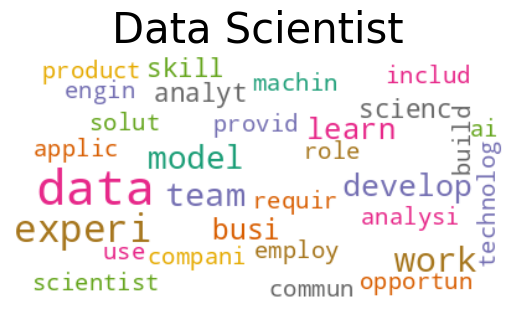

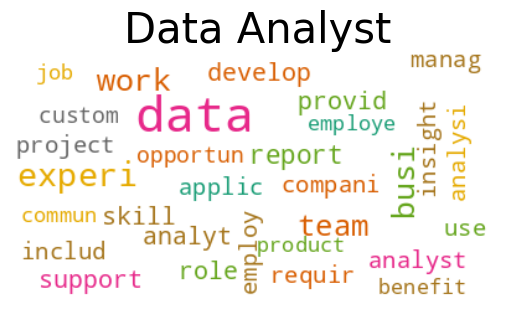

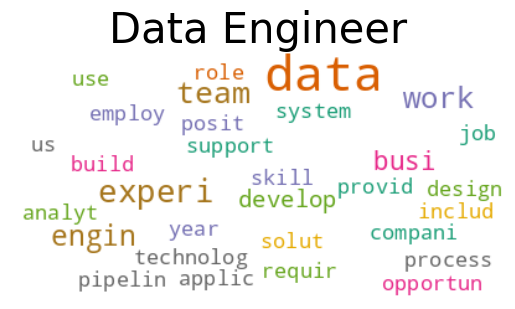

In [87]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

d_ds, d_da, d_de = {}, {}, {}

# Put into each dictionary holder the token-count pair
for obj, d in ((c_ds, d_ds), (c_da, d_da), (c_de, d_de)):
    for tokens in obj:
        d[tokens[0]] = tokens[1]

# Create stopword list:
stopwords = set(STOPWORDS)

wc = WordCloud(stopwords=stopwords, background_color='white',colormap = 'Dark2', max_font_size=40, random_state=10, max_words=100)

# Top 30 Frequency of Data Scientist Postion
wc.generate_from_frequencies(frequencies=d_ds)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.title('Data Scientist', fontsize=30)
plt.axis("off")
plt.show()

# Top 30 Frequency of Data Analyst Postion
wc.generate_from_frequencies(frequencies=d_da)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.title('Data Analyst', fontsize=30)
plt.axis("off")
plt.show()

# Top 30 Frequency of Data Engineer Postion
wc.generate_from_frequencies(frequencies=d_de)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.title('Data Engineer', fontsize=30)
plt.axis("off")
plt.show()

In [88]:
import math

# Calculate TF score based on term document matrix
# Return TDM based on tf
def computeTF(td_matrix):
    # Regular tf
    td_matrix = (td_matrix.T / td_matrix.T.sum()).T

    ## Log nomalized tf (If needed)
    # td_matrix = td_matrix.apply(lambda x: np.log(x + 1))

    return td_matrix

# Calculate IDF score based on term document matrix
# Return a dictionary of IDF values for each term
def computeIDF(td_matrix):
    idfDict = {}
    N = len(td_matrix)

    # Doc Frequency of each term
    for term in list(td_matrix.columns):
        idfDict[term] = len(td_matrix[td_matrix[term] > 0])

    for word, val in idfDict.items():
        # Smoothing idf
        idfDict[word] = math.log10( N / (1+float(val))) + 1

    return idfDict


# Calculate TF*IDF Score
# Return updated tdm
def computeTfIdf(tdm, idf_dict):
    # calculate tf*idf and update the term document matrix
    for key, value in idf_dict.items():
        tdm[key] = tdm[key] * value
    return tdm

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

# Corpus of job descriptions based on the job titles
corpus_ds = [doc for doc in ds['Cleaned']]
corpus_da = [doc for doc in da['Cleaned']]
corpus_de = [doc for doc in de['Cleaned']]

# Convert the above corpus comprised of job descriptions to a matrix of token counts.
cv1 = CountVectorizer(stop_words = 'english')
ds_cv = cv1.fit_transform(corpus_ds)

cv2 = CountVectorizer(stop_words = 'english')
da_cv = cv2.fit_transform(corpus_da)

cv3 = CountVectorizer(stop_words = 'english')
de_cv = cv3.fit_transform(corpus_de)

# Term Document Matrix for each job title (Raw Term Frequency)
ds_tdm = pd.DataFrame(ds_cv.toarray(), columns=cv1.get_feature_names_out())
da_tdm = pd.DataFrame(da_cv.toarray(), columns=cv2.get_feature_names_out())
de_tdm = pd.DataFrame(de_cv.toarray(), columns=cv3.get_feature_names_out())

# Term Document Matrix for each job title
ds_normalized = computeTF(ds_tdm)
da_normalized = computeTF(da_tdm)
de_normalized = computeTF(de_tdm)

# Calculate IDF value for each term: dictionary
ds_idf = computeIDF(ds_tdm)
da_idf = computeIDF(da_tdm)
de_idf = computeIDF(de_tdm)

In [90]:
# Update each term document matrix with calculated tf*idf values
for matrix, idf in ((ds_normalized, ds_idf), (da_normalized, da_idf), (de_normalized, de_idf)):
    matrix = computeTfIdf(matrix, idf)

In [91]:
ds_idx = ds_normalized.columns.to_list()
da_idx = da_normalized.columns.to_list()
de_idx = de_normalized.columns.to_list()

ds_mean = ds_normalized.mean().to_list()
da_mean = da_normalized.mean().to_list()
de_mean = de_normalized.mean().to_list()

# Aggreated mean of tf*idf score for each unique term in the corpus
# This aggregated mean could potentially signify the average power of each term from the corpus
ds_tfidf = pd.DataFrame(ds_mean, index=ds_idx, columns=['TF*IDF'])
da_tfidf = pd.DataFrame(da_mean, index=da_idx, columns=['TF*IDF'])
de_tfidf = pd.DataFrame(de_mean, index=de_idx, columns=['TF*IDF'])

In [92]:
ds_tfidf.sort_values(by = ['TF*IDF'], ascending=False).head(15)

,TF*IDF
data,0.029181
experi,0.017986
model,0.014056
skill,0.013563
work,0.012723
commun,0.011965
develop,0.010496
analyt,0.010467
learn,0.010289
team,0.009839


In [93]:
da_tfidf.sort_values(by = ['TF*IDF'], ascending=False).head(15)

,TF*IDF
data,0.038542
experi,0.017178
analyst,0.012760
busi,0.011978
team,0.010109
work,0.009799
skill,0.009390
manag,0.009083
analysi,0.008683
role,0.008372


In [94]:
de_tfidf.sort_values(by = ['TF*IDF'], ascending=False).head(15)

,TF*IDF
data,0.047890
experi,0.015918
engin,0.012728
team,0.011988
work,0.011706
develop,0.009125
job,0.008830
role,0.007974
busi,0.007962
design,0.007468
